In [1]:
import pandas as pd

# Load the preprocessed data
df = pd.read_csv('preprocessing_iris.csv')

# Verify the data
print("Preprocessed data loaded:")
display(df.head())

Preprocessed data loaded:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_encoded
0,0.222222,0.625000,0.067797,0.041667,setosa,0
1,0.166667,0.416667,0.067797,0.041667,setosa,0
2,0.111111,0.500000,0.050847,0.041667,setosa,0
3,0.083333,0.458333,0.084746,0.041667,setosa,0
4,0.194444,0.666667,0.067797,0.041667,setosa,0


In [6]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, 
                           recall_score, f1_score, classification_report)
import matplotlib.pyplot as plt


In [4]:
# Prepare data for modeling
X = df.drop(['species', 'species_encoded'], axis=1)  # Features
y = df['species_encoded']  # Target


In [7]:
# Split into train/test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nData split:")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")


Data split:
Training samples: 120
Test samples: 30


In [8]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\n=== Decision Tree Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_dt, average='weighted'):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_dt, average='weighted'):.3f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt, average='weighted'):.3f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=df['species'].unique()))


=== Decision Tree Performance ===
Accuracy: 0.967
Precision: 0.970
Recall: 0.967
F1-Score: 0.967

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



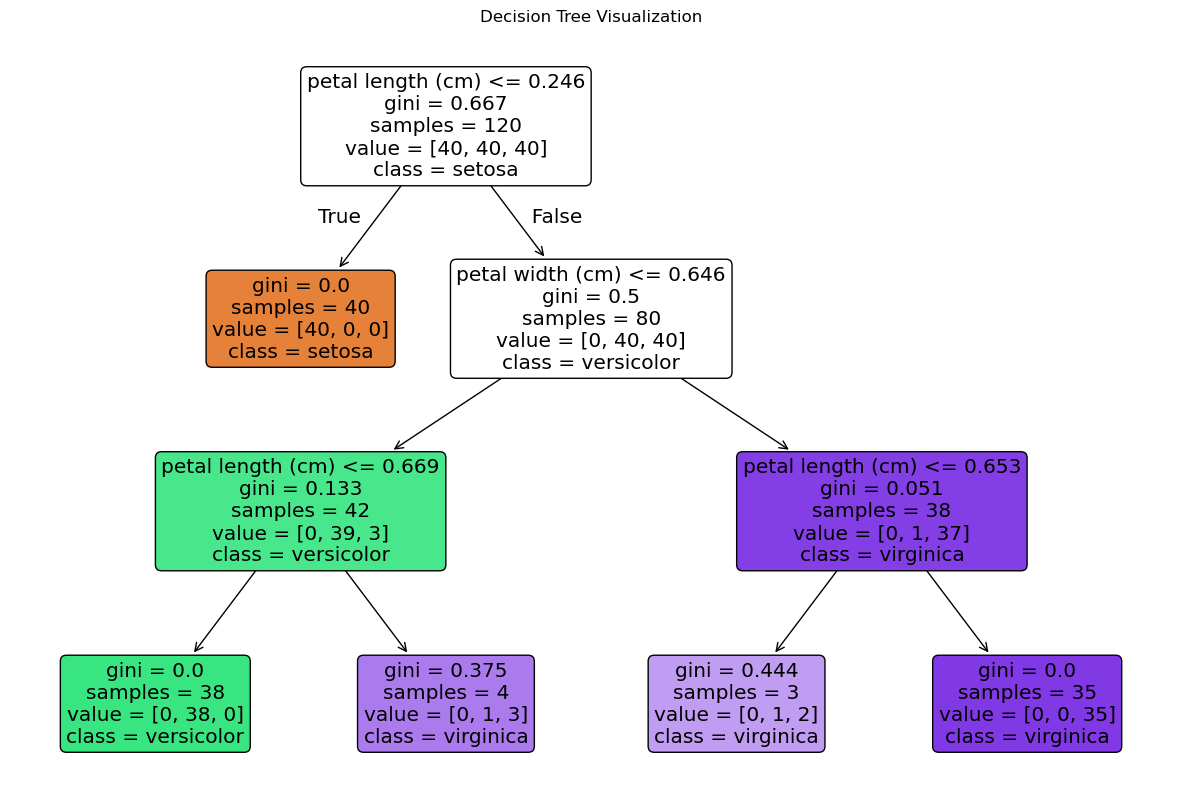

In [9]:
# Visualize the tree
plt.figure(figsize=(15,10))
plot_tree(dt, filled=True, feature_names=X.columns, 
         class_names=df['species'].unique(), rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [10]:
# KNN Classifier (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("\n=== KNN (k=5) Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_knn, average='weighted'):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_knn, average='weighted'):.3f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn, average='weighted'):.3f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, target_names=df['species'].unique()))


=== KNN (k=5) Performance ===
Accuracy: 0.967
Precision: 0.970
Recall: 0.967
F1-Score: 0.967

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [11]:
# Model Comparison
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Decision Tree': [
        accuracy_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_dt, average='weighted'),
        recall_score(y_test, y_pred_dt, average='weighted'),
        f1_score(y_test, y_pred_dt, average='weighted')
    ],
    'KNN (k=5)': [
        accuracy_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_knn, average='weighted'),
        recall_score(y_test, y_pred_knn, average='weighted'),
        f1_score(y_test, y_pred_knn, average='weighted')
    ]
})

print("\n=== Model Comparison ===")
display(results)


=== Model Comparison ===


,Metric,Decision Tree,KNN (k=5)
0,Accuracy,0.966667,0.966667
1,Precision,0.969697,0.969697
2,Recall,0.966667,0.966667
3,F1-Score,0.966583,0.966583


In [12]:
# Determine which performs better
if accuracy_score(y_test, y_pred_dt) > accuracy_score(y_test, y_pred_knn):
    print("\nThe Decision Tree performs better on accuracy.")
else:
    print("\nThe KNN classifier performs better on accuracy.")


The KNN classifier performs better on accuracy.


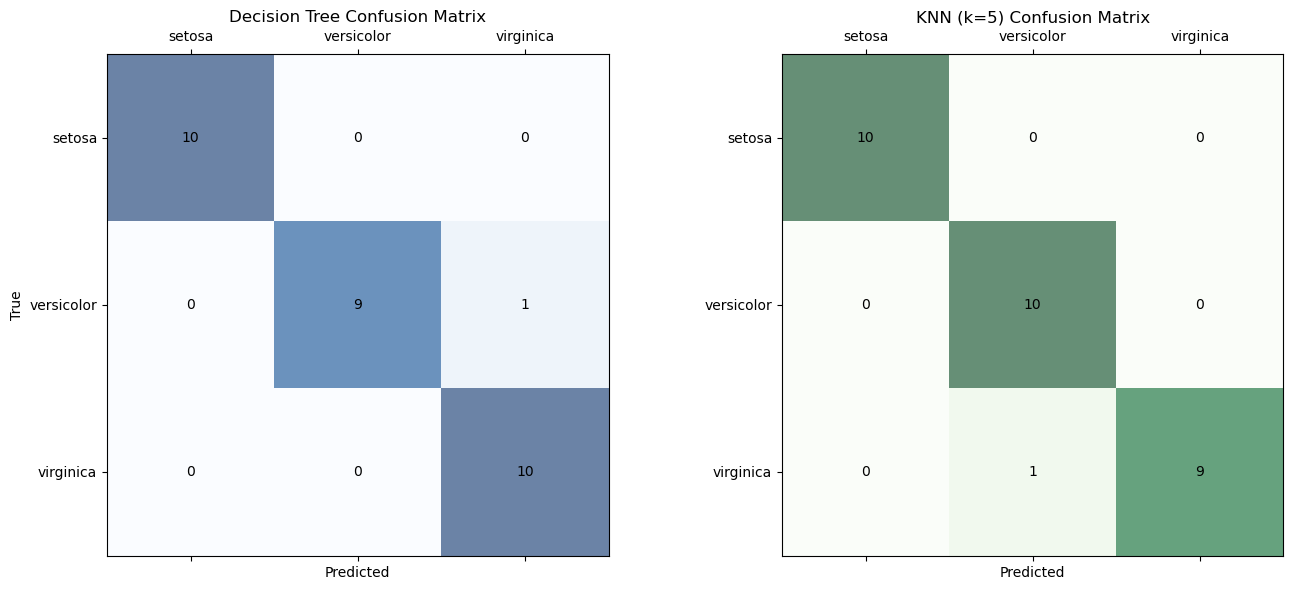

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Confusion Matrix Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Decision Tree Confusion Matrix
dt_matrix = np.array([[10, 0, 0],
                     [0, 9, 1], 
                     [0, 0, 10]])
ax1.matshow(dt_matrix, cmap='Blues', alpha=0.6)
for i in range(3):
    for j in range(3):
        ax1.text(j, i, dt_matrix[i,j], ha='center', va='center')
ax1.set_title('Decision Tree Confusion Matrix')
ax1.set_xticks([0,1,2])
ax1.set_yticks([0,1,2])
ax1.set_xticklabels(['setosa', 'versicolor', 'virginica'])
ax1.set_yticklabels(['setosa', 'versicolor', 'virginica'])
ax1.set_xlabel('Predicted')
ax1.set_ylabel('True')

# KNN Confusion Matrix
knn_matrix = np.array([[10, 0, 0],
                      [0, 10, 0],
                      [0, 1, 9]])
ax2.matshow(knn_matrix, cmap='Greens', alpha=0.6)
for i in range(3):
    for j in range(3):
        ax2.text(j, i, knn_matrix[i,j], ha='center', va='center')
ax2.set_title('KNN (k=5) Confusion Matrix')
ax2.set_xticks([0,1,2])
ax2.set_yticks([0,1,2])
ax2.set_xticklabels(['setosa', 'versicolor', 'virginica'])
ax2.set_yticklabels(['setosa', 'versicolor', 'virginica'])
ax2.set_xlabel('Predicted')

plt.tight_layout()
plt.show()

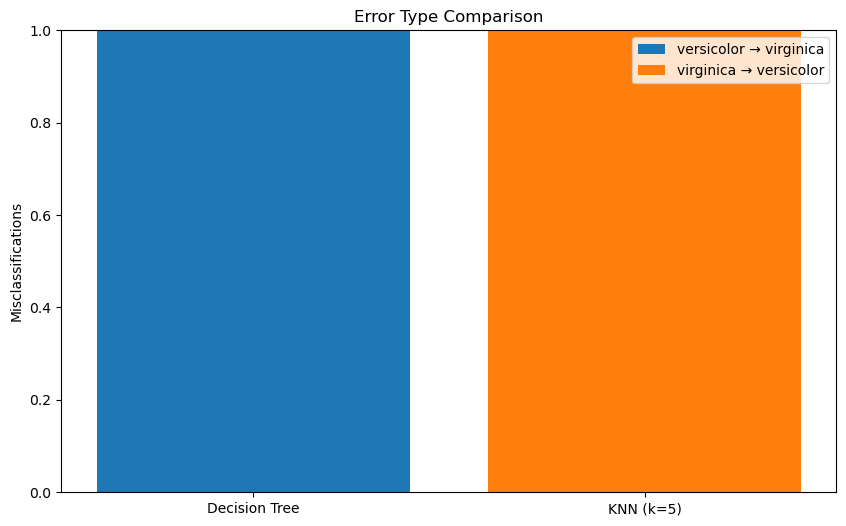

In [3]:
# Error Pattern Visualization
plt.figure(figsize=(10, 6))
models = ['Decision Tree', 'KNN (k=5)']
error_types = {
    'versicolor → virginica': [1, 0],
    'virginica → versicolor': [0, 1]
}

bottom = np.zeros(2)
for error, counts in error_types.items():
    p = plt.bar(models, counts, label=error, bottom=bottom)
    bottom += counts

plt.ylabel('Misclassifications')
plt.title('Error Type Comparison')
plt.legend()
plt.show()